In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import seaborn as sns
import random as rd
import keras
from sklearn.metrics import confusion_matrix

In [ ]:
PATH = './'

train_dataset_path = pd.read_csv(os.path.join(PATH, 'mnist_train.csv'))
test_dataset_path = pd.read_csv(os.path.join(PATH, 'mnist_test.csv'))

train_dataset_path.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = np.array(train_dataset_path)
test_data = np.array(test_dataset_path)

x_train = train_data[:, 1:]
x_test = test_data[:, 1:]

y_train = train_data[:, 0]
y_test = test_data[:, 0]

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


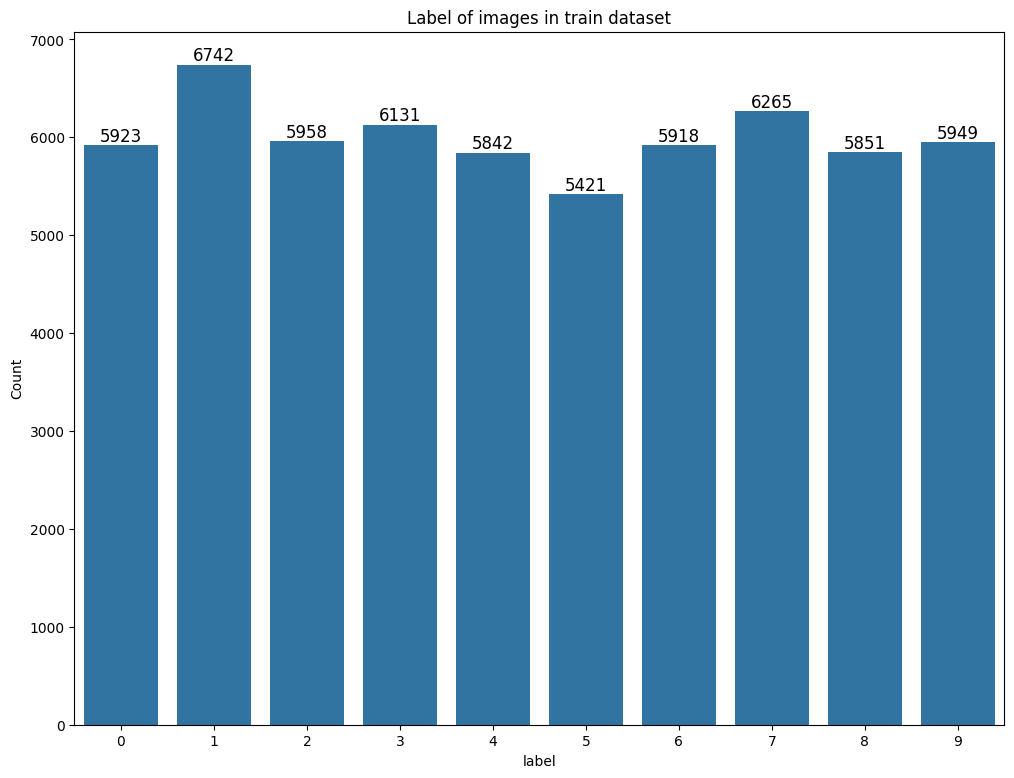

In [ ]:
fig = plt.figure(figsize=(12, 9))
axes = sns.countplot(x="label", data= train_dataset_path)
for p in axes.patches:
    axes.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12, color='black')
axes.set_ylabel('Count')
axes.set_title('Label of images in train dataset')
plt.show()

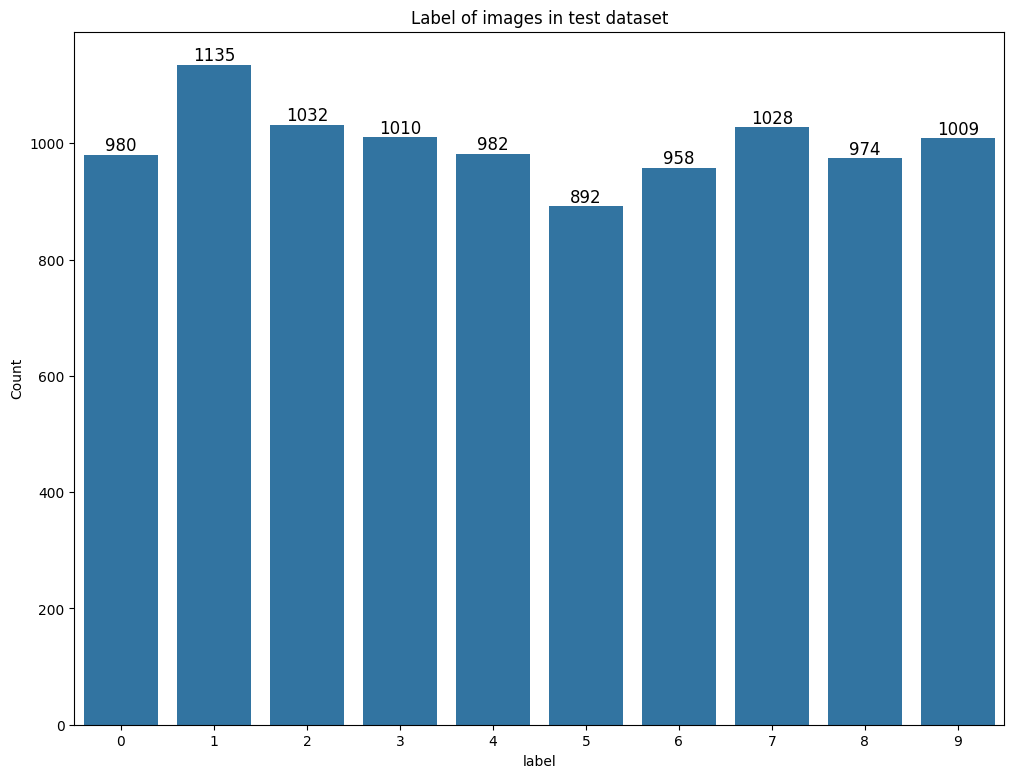

In [ ]:
fig = plt.figure(figsize=(12, 9))
axes = sns.countplot(x="label", data= test_dataset_path)
for p in axes.patches:
    axes.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12, color='black')
axes.set_ylabel('Count')
axes.set_title('Label of images in test dataset')
plt.show()

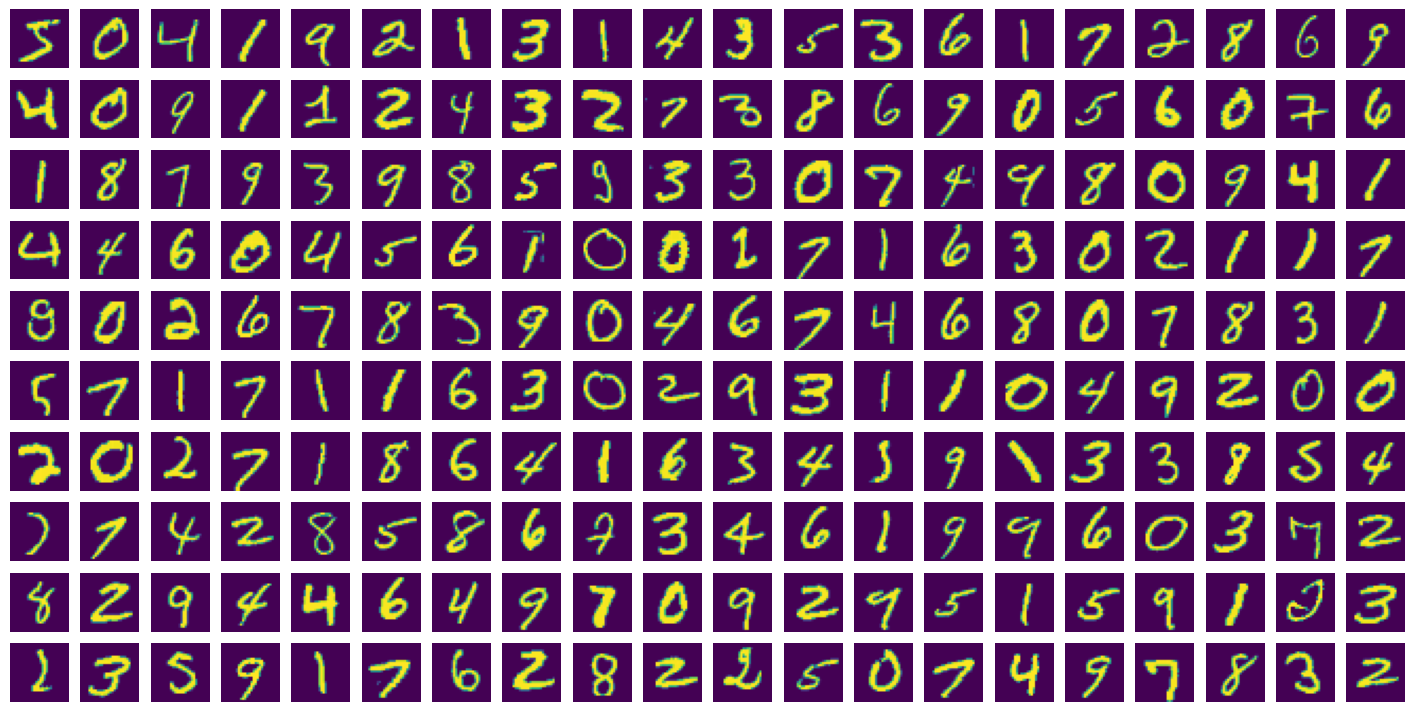

In [ ]:
# 200 sample images, original
plt.figure(figsize=(18, 9))
for i in range(200):
    plt.subplot(10, 20, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [ ]:
# Scale value of x_train, x_test from [0, 255] -> [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

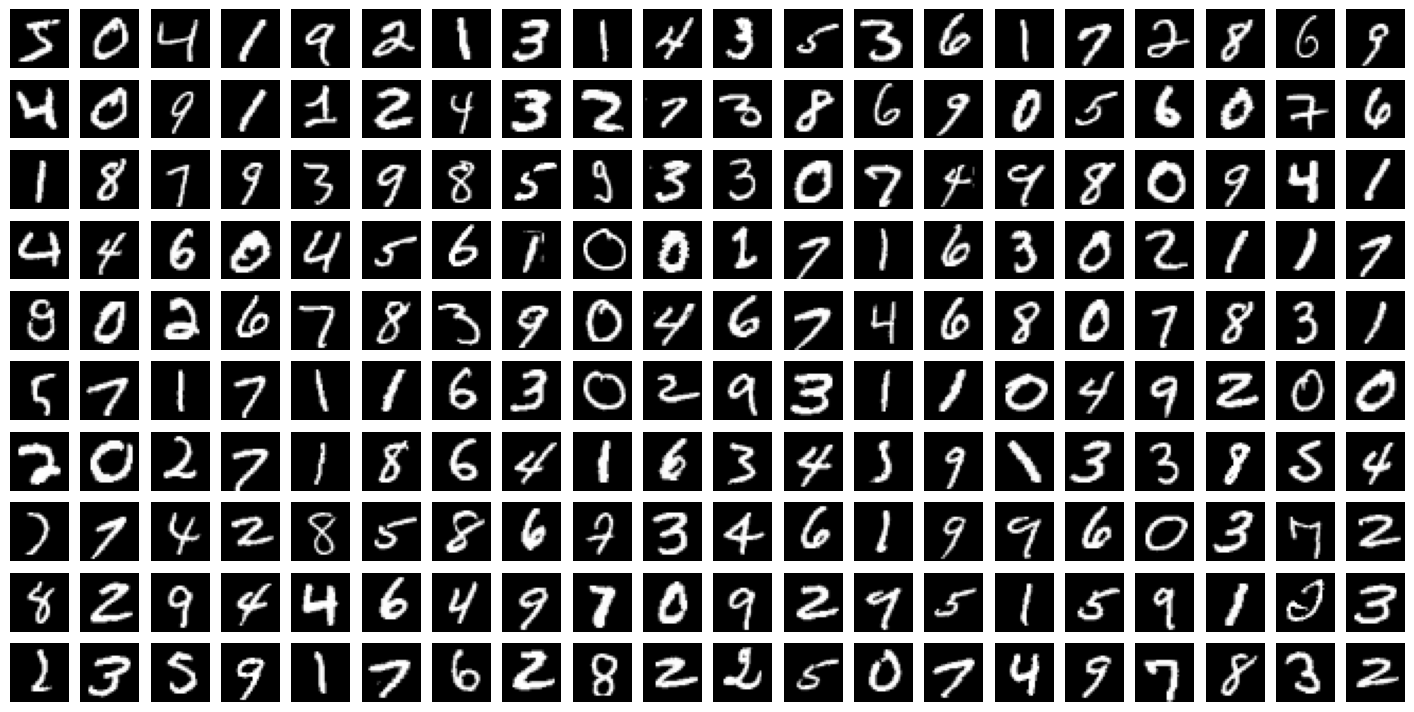

In [ ]:
# 200 sample images, grayscale
plt.figure(figsize=(18, 9))
for i in range(200):
    plt.subplot(10, 20, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

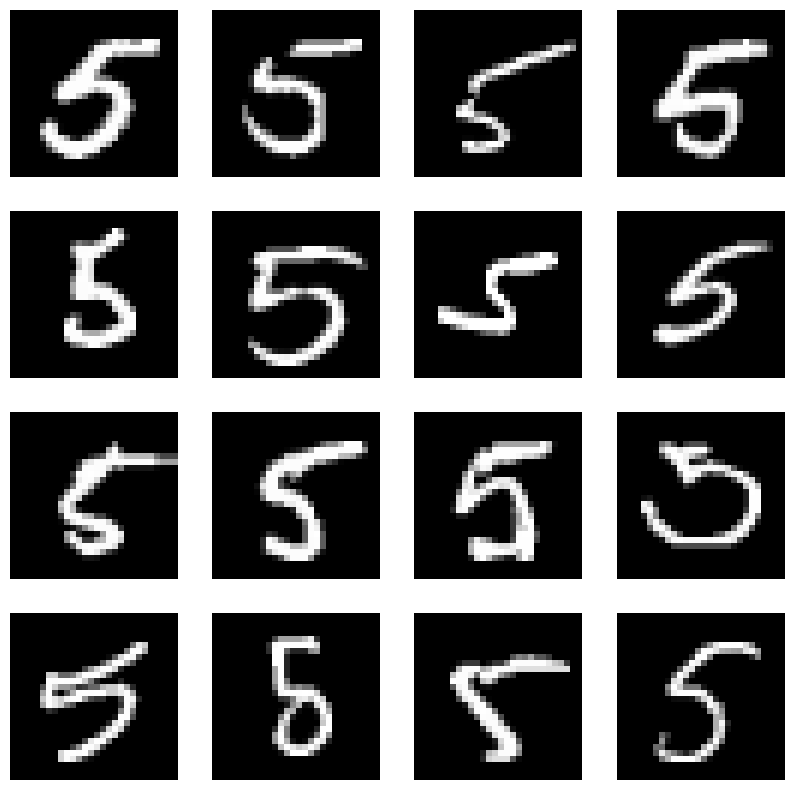

In [ ]:
# digit 5
digit_indices = np.where(y_train == 5)[0]
digit_images = x_train[digit_indices]

num_examples = 16
selected_indices = np.random.choice(len(digit_images), num_examples, replace=False)
selected_images = digit_images[selected_indices]

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.axis('off')

plt.show()

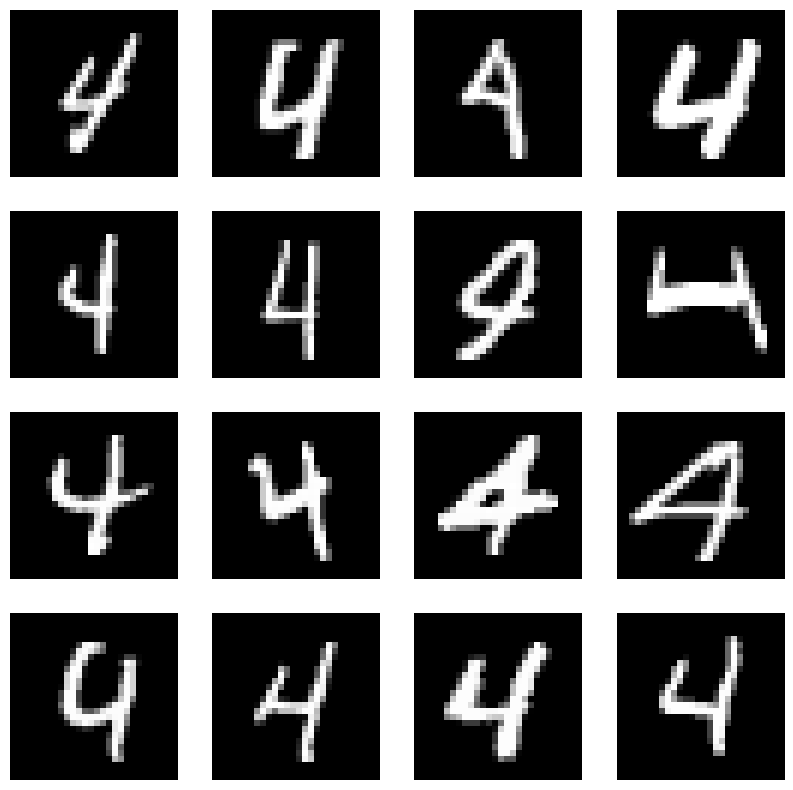

In [ ]:
# digit 4
digit_indices = np.where(y_train == 4)[0]
digit_images = x_train[digit_indices]

num_examples = 16
selected_indices = np.random.choice(len(digit_images), num_examples, replace=False)
selected_images = digit_images[selected_indices]

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.axis('off')

plt.show()

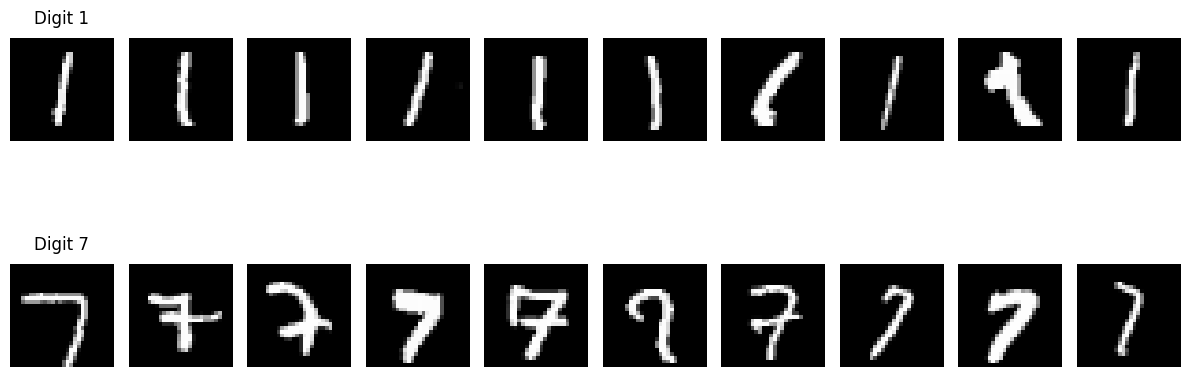

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

digits_to_compare = [1, 7]
num_examples_per_digit = 10

fig, axes = plt.subplots(len(digits_to_compare), num_examples_per_digit, figsize=(12, 6))

for row_idx, digit in enumerate(digits_to_compare):
    digit_indices = np.where(y_train == digit)[0]
    digit_images = x_train[digit_indices]

    selected_indices = np.random.choice(len(digit_images), num_examples_per_digit, replace=False)
    selected_images = digit_images[selected_indices]

    for col_idx, ax in enumerate(axes[row_idx]):
        ax.imshow(selected_images[col_idx], cmap='gray')
        ax.axis('off')
        if col_idx == 0:
            ax.set_title(f"Digit {digit}", pad=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

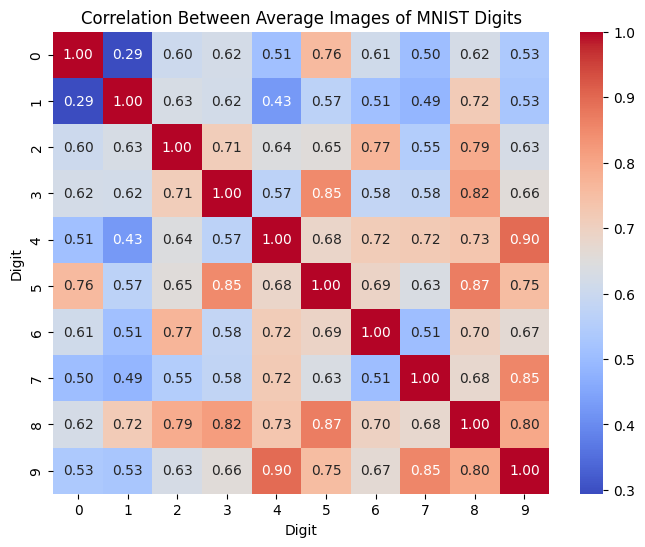

In [ ]:
# Compute mean image for each digit
mean_images = np.zeros((10, 28, 28))
X_train = x_train.reshape(x_train.shape[0], *(28, 28))
for digit in range(10):
    mean_images[digit] = X_train[y_train == digit].mean(axis=0)

mean_images_flat = mean_images.reshape(10, -1)

corr_matrix = np.corrcoef(mean_images_flat)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=range(10), yticklabels=range(10))
plt.title('Correlation Between Average Images of MNIST Digits')
plt.xlabel('Digit')
plt.ylabel('Digit')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

K = 10
N = 60000
X = x_train[np.random.choice(x_train.shape[0], N)]
X = X.reshape(X.shape[0], 784)
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

In [ ]:
def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)


    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

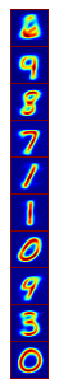

In [ ]:
plt.axis('off')
A = display_network(kmeans.cluster_centers_.T, 10, 1)
f2 = plt.imshow(A, interpolation='nearest',cmap=plt.cm.jet)
plt.show()

In [ ]:
N0 = 10;
K = 10
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X[pred_label == k, :]

    X1[N0*k: N0*k + N0,:] = Xk[:N0, :]

    centroid_k = kmeans.cluster_centers_[k]
    neigh = NearestNeighbors(n_neighbors=N0) # get N0 nearest neighbors
    neigh.fit(Xk)

    centroid_k = centroid_k.reshape(1, -1)

    X2[N0*k: N0*k + N0,:] = Xk[neigh.kneighbors(centroid_k, N0)[1][0], :]

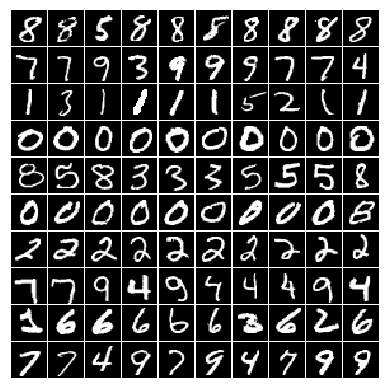

In [ ]:
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest', cmap='gray')
plt.show()